<a href="https://colab.research.google.com/github/mannmoshe/deep-learning/blob/main/FinalProject/InquiriesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Final Project<br>
## Classify inquieries for customer assistant<br>
By Moshe Mann

The goal is to classify inquiries for treatment group.

In [38]:
import pandas as pd
import numpy as np
from itertools import islice
from sklearn.model_selection import train_test_split

filepath = 'https://raw.githubusercontent.com/mannmoshe/deep-learning/main/FinalProject/ca_data.csv'
ca_data = pd.read_csv(filepath, sep=',')

In [39]:
ca_data.head()

,ticketNum,Description,groupTreatment,groupTreatmentCode
0,I-5280814,נושא: RE: 352-0723635 בהוראות התכנית המקוונ...,צוות הדרכה והטמעה אפליקטיבי,2
1,I-5347670,נושא: עדכון תכנית מישיבות היי אלי כבר דיברת...,צוות הדרכה והטמעה אפליקטיבי,2
2,I-5393789,נושא: אפשרות חיפוש בחלונית בחירת ישויות מאוחד...,צוות הדרכה והטמעה אפליקטיבי,2
3,I-6139329,נושא: FW: צרופה לתכנית 553-0674457 ממערכת מבאת...,צוות הדרכה והטמעה אפליקטיבי,2
4,I-5544212,"שלום רב, נושא: השמשת מולטימדיה בחדרי החקירות צ...",צוות טכנאים,1


The ticketNum is shuffeled (Not true data).

In [40]:
counts = ca_data['groupTreatment'].value_counts()
percent = counts / counts.sum()
fmt = '{:.1%}'.format
print('all data distribution:')
pd.DataFrame({'counts': counts, 'per': percent.map(fmt)})

all data distribution:


,counts,per
7878 מרכז שירות ותמיכה טכנולוגית,4455,65.0%
צוות טכנאים,1397,20.4%
צוות הדרכה והטמעה אפליקטיבי,845,12.3%
צוות תשתיות/סיסטם,142,2.1%
תקשורת ואבטחת מידע,8,0.1%
צוות פיקוח על הבניה,3,0.0%
צוות אינטגרציה,2,0.0%
צוות מרכז תמיכה URD,1,0.0%


This is the code of every group, <br>
all the groups with less than 10% of the inquiries have been grouped to one group ("other") <br> and got the same code.  

In [41]:
ca_data[['groupTreatment', 'groupTreatmentCode']].drop_duplicates().sort_values(by=['groupTreatmentCode'])

,groupTreatment,groupTreatmentCode
26,7878 מרכז שירות ותמיכה טכנולוגית,0
4,צוות טכנאים,1
0,צוות הדרכה והטמעה אפליקטיבי,2
6,צוות תשתיות/סיסטם,3
13,צוות מרכז תמיכה URD,3
14,צוות אינטגרציה,3
22,צוות פיקוח על הבניה,3
1888,תקשורת ואבטחת מידע,3


In [42]:
X = ca_data['Description']
y = ca_data['groupTreatmentCode']

In [43]:
x_train_temp, x_test_temp, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4, stratify=y)

stratify=y for keeping the same distribution at the train and the test.

In [44]:
print(x_train_temp.head(1), y_train.head(1))
print(x_train_temp.shape, y_train.shape)

405    נושא: דוח של נוכחות חברי ועדה משנה ב' מחוז תל ...
Name: Description, dtype: object 405    0
Name: groupTreatmentCode, dtype: int64
(4591,) (4591,)


In [45]:
print(x_test_temp.head(1), y_test.head(1))
print(x_test_temp.shape, y_test.shape)

455    נושא: היי , אודה לעזרתכם בדבר שליחת הודעה מה H...
Name: Description, dtype: object 455    0
Name: groupTreatmentCode, dtype: int64
(2262,) (2262,)


In [46]:
counts = y_train.value_counts()
percent = counts / counts.sum()
fmt = '{:.1%}'.format
print('y_train distribution:')
pd.DataFrame({'counts': counts, 'per': percent.map(fmt)})

y_train distribution:


,counts,per
0,2985,65.0%
1,936,20.4%
2,566,12.3%
3,104,2.3%


In [47]:
counts = y_test.value_counts()
percent = counts / counts.sum()
fmt = '{:.1%}'.format
print('y_test distribution:')
pd.DataFrame({'counts': counts, 'per': percent.map(fmt)})

y_test distribution:


,counts,per
0,1470,65.0%
1,461,20.4%
2,279,12.3%
3,52,2.3%


# PreProcessing

Get top 10,000 frequent words from train data.

In [48]:
train_samples = x_train_temp.tolist()
test_samples = x_test_temp.tolist()

In [49]:
from keras.preprocessing.text import Tokenizer

In [50]:
# We create a tokenizer, configured to only take
# into account the top-10000 most common words
tokenizer = Tokenizer(num_words=10000)
# This builds the word index
tokenizer.fit_on_texts(train_samples)

# This turns strings into lists of integer indices.
train_sequences = tokenizer.texts_to_sequences(train_samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
x_train = tokenizer.texts_to_matrix(train_samples, mode='binary')
x_test = tokenizer.texts_to_matrix(test_samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15923 unique tokens.


In [51]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [52]:
len(x_train[0])

10000

**Encoding the labels**

In [53]:
train_labels = y_train.to_numpy()
test_labels = y_test.to_numpy()

In [54]:
def to_one_hot(labels, dimension=4):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [55]:
print(train_labels[0], train_labels[5])
print(y_train[0], y_train[5]) 

0 2
[1. 0. 0. 0.] [0. 0. 1. 0.]


# Model definition

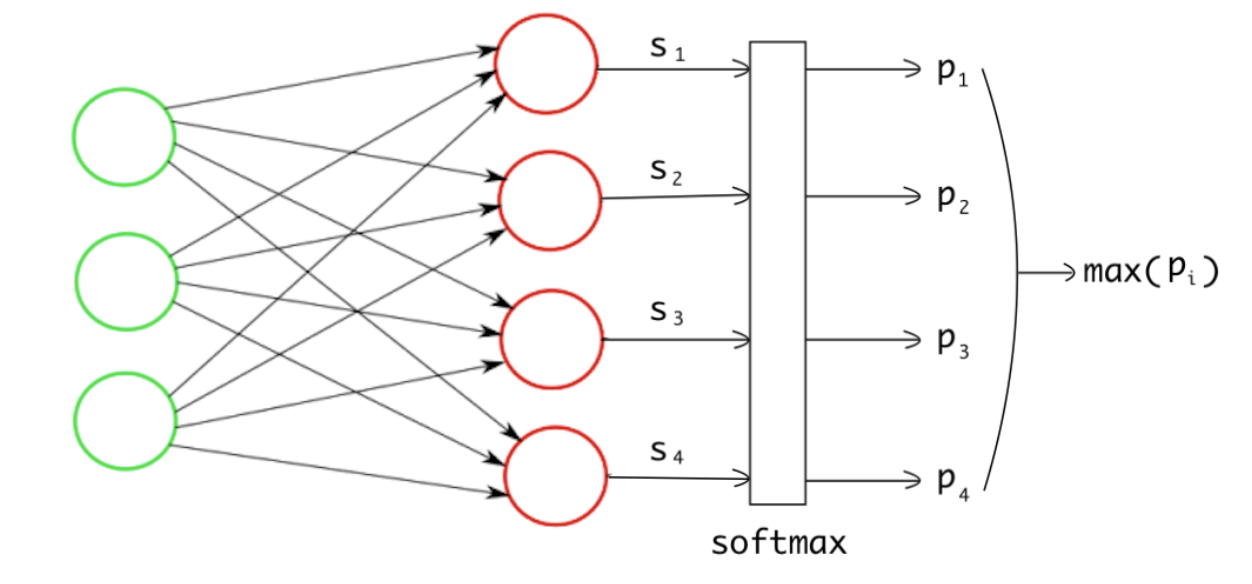

In [56]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="softmax")
])

In [57]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [59]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
8/8 [==============================] - 1s 73ms/step - loss: 1.0953 - accuracy: 0.6179 - val_loss: 0.8774 - val_accuracy: 0.6740
Epoch 2/20
8/8 [==============================] - 0s 50ms/step - loss: 0.7738 - accuracy: 0.6895 - val_loss: 0.7585 - val_accuracy: 0.7010
Epoch 3/20
8/8 [==============================] - 0s 50ms/step - loss: 0.5979 - accuracy: 0.7803 - val_loss: 0.6981 - val_accuracy: 0.7500
Epoch 4/20
8/8 [==============================] - 0s 46ms/step - loss: 0.4677 - accuracy: 0.8574 - val_loss: 0.6669 - val_accuracy: 0.7500
Epoch 5/20
8/8 [==============================] - 0s 47ms/step - loss: 0.3666 - accuracy: 0.8914 - val_loss: 0.6564 - val_accuracy: 0.7500
Epoch 6/20
8/8 [==============================] - 0s 48ms/step - loss: 0.2925 - accuracy: 0.9195 - val_loss: 0.6689 - val_accuracy: 0.7510
Epoch 7/20
8/8 [==============================] - 0s 47ms/step - loss: 0.2331 - accuracy: 0.9354 - val_loss: 0.7042 - val_accuracy: 0.7040
Epoch 8/20
8/8 [===========

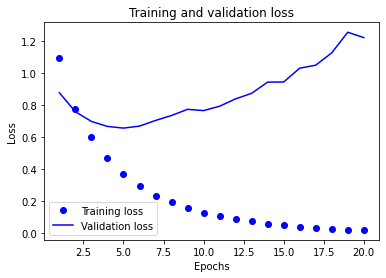

In [60]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

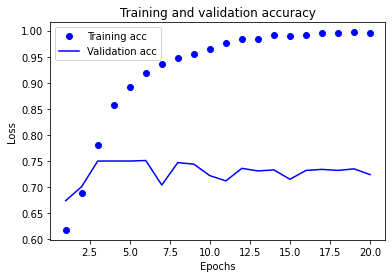

In [61]:
plt.clf() # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [62]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(4, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=5,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
9/9 [==============================] - 1s 46ms/step - loss: 1.0680 - accuracy: 0.6236
Epoch 2/5
9/9 [==============================] - 0s 43ms/step - loss: 0.7229 - accuracy: 0.7214
Epoch 3/5
9/9 [==============================] - 0s 44ms/step - loss: 0.5377 - accuracy: 0.8048
Epoch 4/5
9/9 [==============================] - 0s 44ms/step - loss: 0.4073 - accuracy: 0.8769
Epoch 5/5
71/71 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.7546


In [63]:
print('loss:' ,results[0])
print('acc:' ,results[1])

loss: 0.6111011505126953
acc: 0.7546418905258179



This approach reaches an accuracy of ~76%.<br>
Pretty good, at least when compared to
a random baseline:

In [64]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print('random baseline:')
hits_array.mean()

random baseline:


0.46595932802829354

In [65]:
predictions = model.predict(x_test)

In [66]:
len(predictions)

2262

In [67]:
treatment_group_predictions = np.array([np.argmax(predictions[i]) for i in range(len(predictions))])

In [68]:
treatment_group_predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0])

In [69]:
test_labels[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, treatment_group_predictions)

0.7546419098143236

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, treatment_group_predictions)

array([[1313,   81,   76,    0],
       [ 201,  259,    1,    0],
       [ 140,    4,  135,    0],
       [  32,   18,    2,    0]])

Now instead of one-hot encoding let's try using embedding layer

In [75]:
lens = [len(s) for s in train_sequences]

In [84]:
lens[:20]

[41, 7, 31, 9, 26, 37, 23, 35, 41, 32, 38, 34, 39, 7, 37, 11, 17, 27, 27, 26]

In [82]:
sum(lens)/len(lens)

26.93944674362884

average of 27 words to inquiery.

In [101]:
# preprocess train_sequences for embedding layer
# if inquiery is shorter than 27 words we will add zeros
max_len = 27
x_train_embedding = []

for s in train_sequences:
  if len(s) >= 27:
    x_train_embedding.append(s[:27])
  else:
    x_train_embedding.append(s + [0]*(max_len-len(s)))

x_train_embedding = np.array(x_train_embedding)

In [106]:
x_train_embedding[1]

array([   1, 1476,  160, 1771,   63,    6,  341,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

In [117]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train_embedding, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.33)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 27, 8)             80000     
                                                                 
 flatten_11 (Flatten)        (None, 216)               0         
                                                                 
 dense_27 (Dense)            (None, 16)                3472      
                                                                 
 dense_28 (Dense)            (None, 4)                 68        
                                                                 
Total params: 83,540
Trainable params: 83,540
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
97/97 [==============================] - 1s 4ms/step - loss: 1.0378 - acc: 0.6478 - val_loss: 0.8826 - val_acc: 0.6491
Epoch 2/10
97/97 [==============================] -

# RNN with LSTM

In [121]:
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [125]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=max_len))
# model.add(LSTM(32, return_sequences = True))
# model.add(Dropout(0.2)) 
# model.add(LSTM(32, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(32, return_sequences = True))
# model.add(Dropout(0.2))
model.add(LSTM(64))

model.add(Dense(4, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train_embedding, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.33)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 27, 8)             80000     
                                                                 
 lstm_8 (LSTM)               (None, 64)                18688     
                                                                 
 dense_34 (Dense)            (None, 4)                 260       
                                                                 
Total params: 98,948
Trainable params: 98,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
97/97 [==============================] - 4s 25ms/step - loss: 0.9505 - acc: 0.6452 - val_loss: 0.8384 - val_acc: 0.6497
Epoch 2/10
97/97 [==============================] - 2s 20ms/step - loss: 0.8019 - acc: 0.6670 - val_loss: 0.8535 - val_acc: 0.6893
Epoch 3/10
97/97 [==============================] -